# 4.3.1 미분

미분은 당연히 알테니 가볍게 넘어가자.
$
x \in \mathbb{R} \to y \in \mathbb{R} 인\ 함수\ f(x)에\ 대해\ 점\ (x,y)\ 에서의\ 미분계수는\\
{df(x) \over dx} = \lim_{h \to \infty} \frac{f(x+h) - f(x)}{h} \\
이다. \qquad$ [식 4.4]

이를 참고하여 함수 $f(x)$의 미분계수를 구현해보자.

In [1]:
## 나쁜 구현의 예
def numerical_diff(f, x):
    
    h = 1e-50
    dif = (f(x+h) - f(x)) / h
    
    return dif

이 함수에는 두 가지 고쳤으면 하는 점이 존재한다.

이 함수에서 h는 가급적 작은 값을 대입하고 싶었기에 $10^{-50}$으로 설정하였는데 이는 파이썬 내부에서 반올림 되어 0으로 계산되어 결과적으로 0으로 나누는 오류를 발생할 수 있다. 내가 알기로는 16자리 수까지 반올림 하지않고 표기하는 것으로 알고 있다. 따라서 h를 $10^{-4}$로 하여 사용하자.

다음으로 함수 f의 차분(함수 값들의 차)에 관한 것이다. h를 아무리 작게 하더라도 h가 0으로 갔을때의 경우와 아닐 경우의 $f(x+h) - f(x)$의 값은 달라지게 된다. 따라서 차분을 $f(x+h) - f(x-h)$로 하여 오차를 줄인다. 이는 중심 차분 혹은 중앙 차분이라고 한다. 그리고 앞선 경우는 전방 차분이라 한다.
<img src=images/4_05.png height=100px width=300px>

중앙 차분을 이용하였을때 오차가 줄어드는 이유는, 미분계수가 연속이라는 점에서 납득할 수 있다.

이를 반영하여 새롭게 수치미분 함수를 구현해주면 다음과 같다.

In [2]:
def numerical_diff(f, x):
    
    h = 1e-4
    dif = (f(x+h) - f(x-h)) / (2*h)
    
    return dif

여담으로, 위의 방식은 말 그대로 수치적인 방법으로 어느 정도의 오차가 항상 존재한다. 그리고 미분계수를 구하는 방법에는 해석적인 방법이 있는데, 이는 우리가 아는 미분법을 통해서 함수의 도함수를 구해내어 오차없이 미분계수를 구해낼 수 있다.

# 4.3.2 수치 미분의 예

우선 다음과 같은 2차 함수를 생각하자.

$
y = 
0.01x^2 + 0.1x
\qquad$ [식 4.5]

그리고 이를 파이썬으로 구현해보자

In [3]:
def function_1(x):
    
    y = 0.01 * x**2 + 0.1 * x
    
    return y

이어서 이 함수를 그려보자.

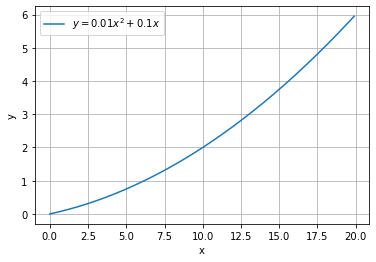

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x, y, label="$y = 0.01x^2 + 0.1x$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

그럼 x = 5 일때와 10 일때의 미분 계수를 계산해보자.

In [6]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


수치적으로 계산된 미분계수는 다음과 같고, $f(x) = 0.01x^2 + 0.1x$의 해석적인 해는 ${df(x) \over dx} = 0.02x + 0.1$ 이다. 그래서 x = 5, 10일때의 미분계수는 각각 0.2와 0.3 이다. 위의 결과와 비교해서 매우 작은 오차를 가진다고 할 수 있다. 구한 수치 미분계수로 접선을 그려보자.

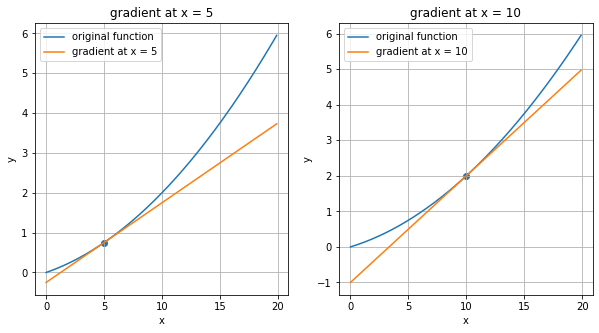

In [18]:
x = np.arange(0.0, 20.0, 0.1)
y_0 = function_1(x)

plt.figure(figsize=(10, 5))
## x = 5
dif = numerical_diff(function_1, 5)
y_p = function_1(5)
y = dif * (x-5) + y_p

plt.subplot(1,2,1)
plt.plot(x, y_0, label="original function")
plt.plot(x, y, label="gradient at x = 5")
plt.scatter(5, y_p)
plt.title("gradient at x = 5")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

## x = 10
dif = numerical_diff(function_1, 10)
y_p = function_1(10)
y = dif * (x-10) + y_p

plt.subplot(1,2,2)
plt.plot(x, y_0, label="original function")
plt.plot(x, y, label="gradient at x = 10")
plt.scatter(10, y_p)
plt.title("gradient at x = 10")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

plt.show()

# 4.3.3 편미분

[식 4.6]을 살펴보자. 인수들의 제곱의 합을 구하는 간단한 함수다.

$
f(x_0, x_1) = x_0^2 + x_1^2
\qquad$ [식 4.6]

앞의 예와 다른점은 변수가 2개라는 점에 주의해야 한다.
이 식을 파이썬을 통해 구현해보자.

In [19]:
def function_2(x):
    
    y = np.sum(x**2)
    
    return y

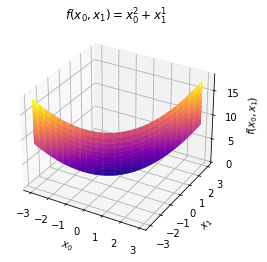

In [40]:
from mpl_toolkits.mplot3d import axes3d

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
z = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        z[i][j] = function_2(np.hstack((x[i], y[j])))

ax = plt.axes(projection="3d")

ax.plot_surface(x, y, z, cmap="plasma")
ax.set_title("$f(x_0, x_1) = x_0^2 + x_1^1$")
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$f(x_0, x_1)$")
plt.show()

그럼 [식 4.6]을 미분해보자. 여기서 주의할 점은 [식 4.6]에는 변수가 2개있다는 점이다. 그래서 "어느 변수에 대한 미분이냐"를 구분해야 한다. 이를 편미분이라고 한다. 편미분은 수식으로 ${\partial f \over \partial x_0}$나 ${\partial f \over \partial x_1}$라고 표현한다.

예를 들어 $x_0 = 3,\ x_1 = 4$일 때의 $x_0,\ x_1$에서의 편미분 값을 구해보자.

In [41]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp1, 3))
print(numerical_diff(function_tmp2, 4))

6.00000000000378
7.999999999999119


이 결과는 해석적 미분의 결과인 6과 8과 비교해 매우 작은 오차를 가지는 적절한 값이다.